### Import data

In [1]:
include("importData.jl")
include("Hill.jl")
include("plot.jl")

conce = [1.0, 5.0, 10.0, 25.0, 50.0, 100.0, 250.0, 500.0]
conc = [log(10, i) for i in conce]
# import G1, G2, and population data
pop, g2, g1, g2_0, g1_0 = get_data(joinpath("..", "data", "lap.csv"),
                                   joinpath("..", "data", "lap_pop.csv"));
# removing peaks from the data
for i in 1:length(conc)
    pop[:, i] = remove_peaks(pop[:, i])
    g2[:, i] = remove_peaks(g2[:, i])
    g1[:, i] = remove_peaks(g1[:, i])
end

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:30
└ @ Main /home/farnazm/dde/enhance/DrugResponseModel.jl/src/importData.jl:30
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[1]:12
└ @ Core ./In[1]:12


### Hill model, residual functions and optimization

In [12]:
#  [EC50, b_steepness, alpha_min, alpha_max, beta_min, beta_max, tau1_mean, tau1_max, tau2_min, tau2_max, gamma1_max, gamma2_max]
# guess
guess = [1.56, 4.5, 0.007, 0.08, 0.04, 0.05, 34.286, 6.56, 8.0, 7.0, 0.005, 0.035]
# guess = [1.48664, 1.97836, 0.00682578, 0.0958013, 0.0503788, 0.0433964, 38.941, 5.49712, 8.94827, 7.20807, 0.00294624, 0.0222821]
# max num of steps
num_steps=1200
parameterrs, pp = optimize_hill(guess, conc, g1, g2, g1_0, g2_0, num_steps)

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
50.43 secs, 296 evals, 221 steps, improv/step: 0.484 (last = 0.4842), fitness=867744.027952015
100.63 secs, 528 evals, 447 steps, improv/step: 0.454 (last = 0.4248), fitness=867722.691524537
150.72 secs, 775 evals, 694 steps, improv/step: 0.419 (last = 0.3563), fitness=867715.258168512
200.79 secs, 1021 evals, 940 steps, improv/step: 0.402 (last = 0.3537), fitness=867709.186452724
250.80 secs, 1260 evals, 1179 steps, improv/step: 0.386 (last = 0.3222), fitness=867709.186427042

Optimization stopped after 1201 steps and 255.54 seconds
Termination reason: Max number of steps (1200) reached
Steps per second = 4.70
Function evals per second = 5.02
Improvements/step = 0.38250
Total function evaluations = 1282


Best candidate found: [1.3158, 2.47973, 0.00774495, 0.069155, 0.0376751, 0.053433, 

(BlackBoxOptim.OptimizationResults("adaptive_de_rand_1_bin_radiuslimited", "Max number of steps (1200) reached", 1201, 1.566505711762297e9, 255.5355520248413, DictChain{Symbol,Any}[DictChain{Symbol,Any}[Dict{Symbol,Any}(:RngSeed=>825951,:SearchRange=>Tuple{Float64,Float64}[(1.0, 2.4), (1.8, 6.7), (0.006, 0.008), (0.04, 0.1), (0.03, 0.06), (0.04, 0.06), (26.0, 40.0), (5.0, 10.0), (7.0, 12.0), (7.0, 11.0), (0.002, 0.006), (0.02, 0.04)],:TraceMode=>:compact,:TraceInterval=>50,:Method=>:adaptive_de_rand_1_bin_radiuslimited,:MaxSteps=>1200),Dict{Symbol,Any}()],Dict{Symbol,Any}(:FitnessScheme=>ScalarFitnessScheme{true}(),:NumDimensions=>:NotSpecified,:PopulationSize=>50,:MaxTime=>0.0,:SearchRange=>(-1.0, 1.0),:Method=>:adaptive_de_rand_1_bin_radiuslimited,:MaxNumStepsWithoutFuncEvals=>100,:RngSeed=>1234,:MaxFuncEvals=>0,:SaveTrace=>false…)], 1282, ScalarFitnessScheme{true}(), BlackBoxOptim.TopListArchiveOutput{Float64,Array{Float64,1}}(867709.1864270425, [1.3158, 2.47973, 0.00774495, 0.06915

### Plot Hill curve for all of the DDE model parameters

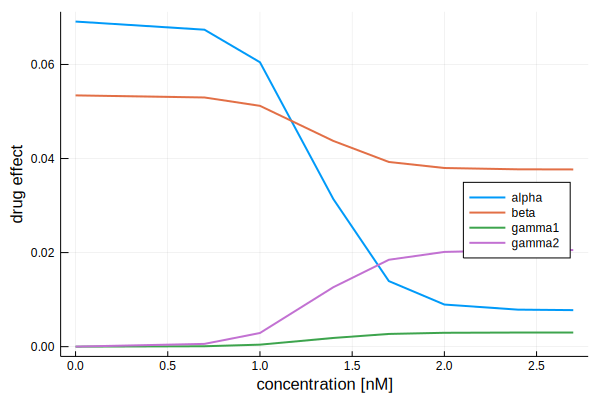

In [13]:
using Plots;
p = getDDEparams(pp, conc)

plot(conc, p[1, :], label = "alpha", linewidth = 2, xlabel = "concentration [nM]", ylabel = "drug effect")
plot!(conc, p[2, :], label = "beta", linewidth = 2, legend =:right)
plot!(conc, p[5, :], label = "gamma1", linewidth = 2)
plot!(conc, p[6, :], label = "gamma2", linewidth = 2)

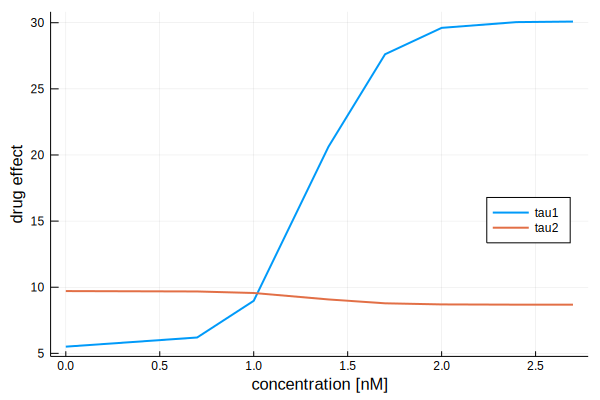

In [14]:
plot(conc, p[3, :], label = "tau1", linewidth = 2, xlabel = "concentration [nM]", ylabel = "drug effect")
plot!(conc, p[4, :], label = "tau2", linewidth = 2, legend =:right)

### Plot the data with the new set of parameters for DDE

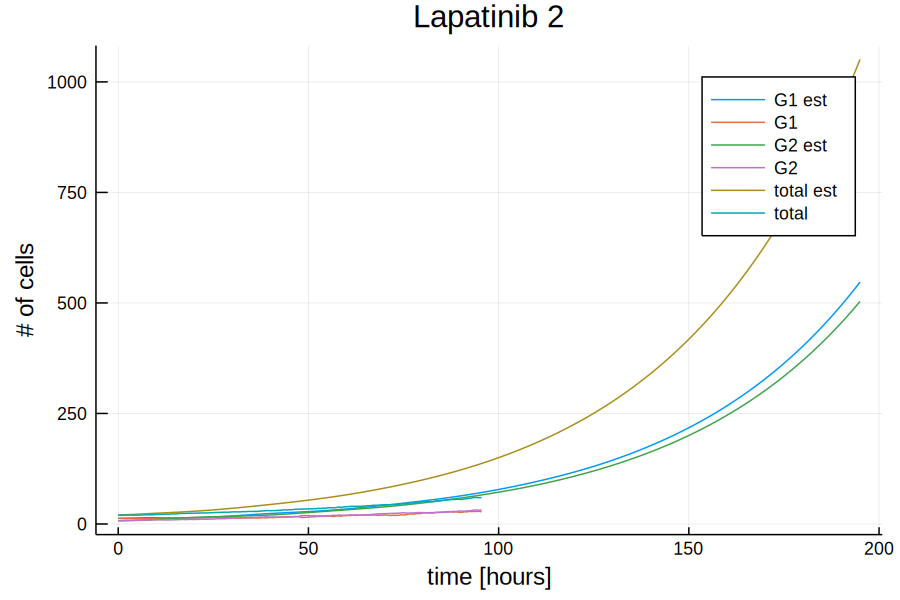

In [15]:
j = 2 # trial number
# for instance we want to plot the data and estimated for some trial 
plotIt(p[:, j], g1, g2, g1_0, g2_0, pop, j, "Lapatinib 2")

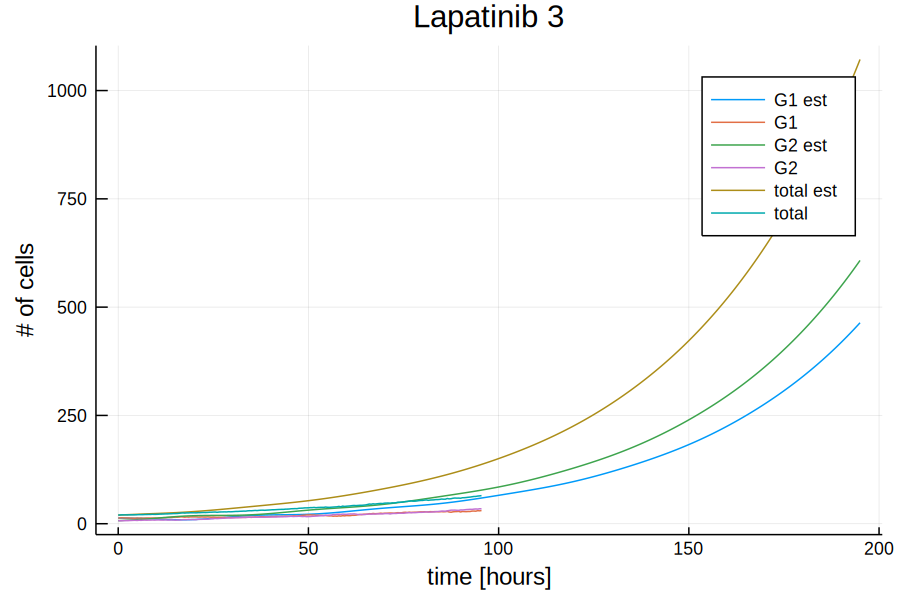

In [6]:
j = 3 # trial number
# for instance we want to plot the data and estimated for some trial 
plotIt(p[:, j], g1, g2, g1_0, g2_0, pop, j, "Lapatinib 3")

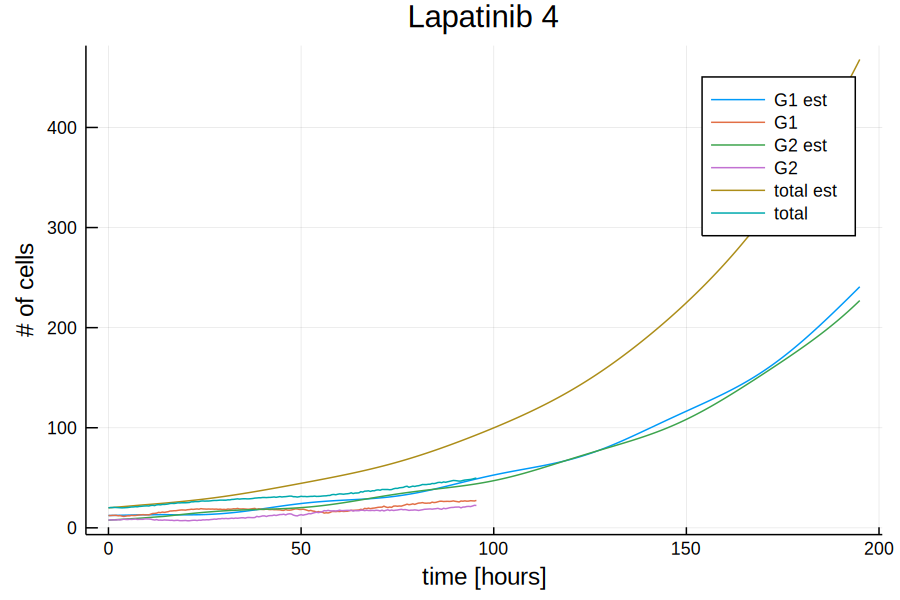

In [7]:
j = 4 # trial number
# for instance we want to plot the data and estimated for some trial 
plotIt(p[:, j], g1, g2, g1_0, g2_0, pop, j, "Lapatinib 4")

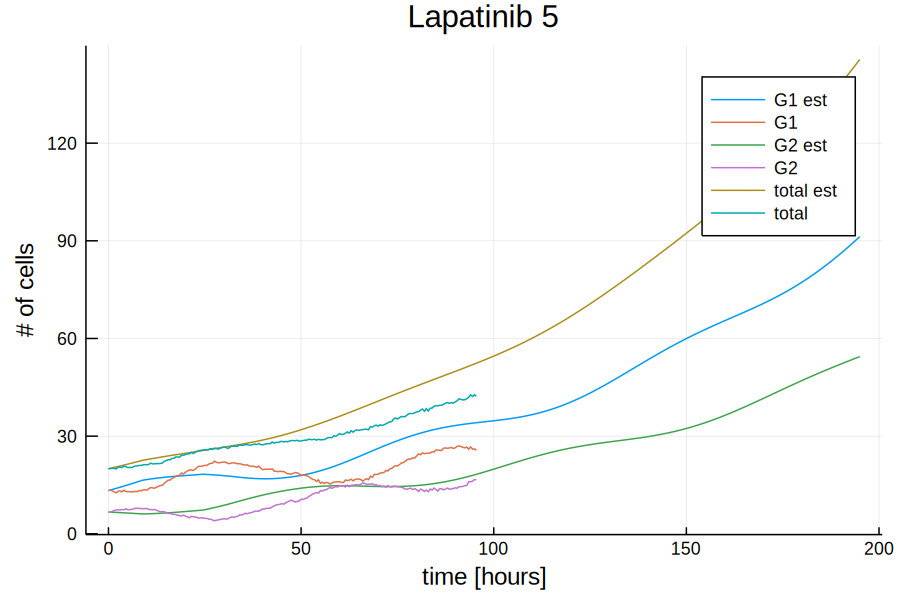

In [8]:
j = 5 # trial number
# for instance we want to plot the data and estimated for some trial 
plotIt(p[:, j], g1, g2, g1_0, g2_0, pop, j, "Lapatinib 5")

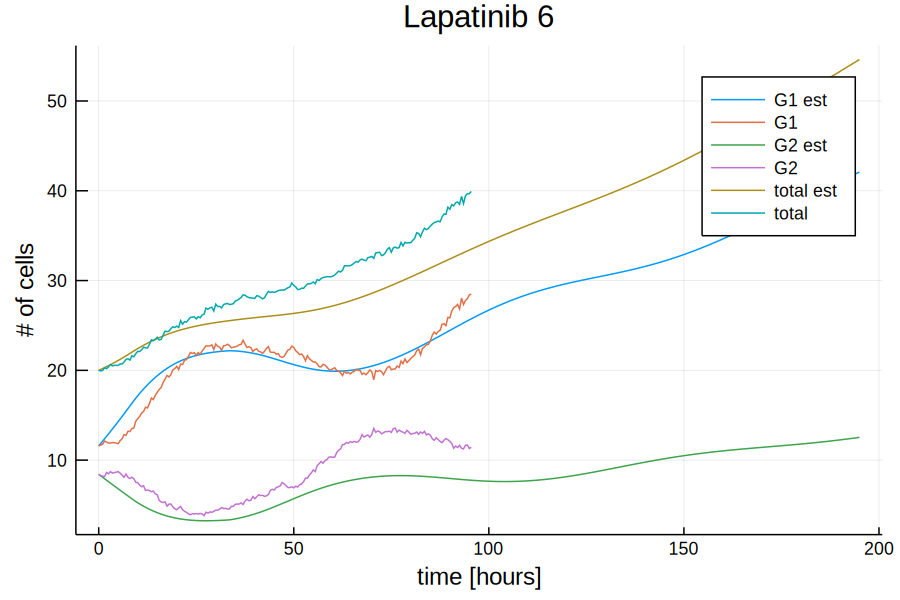

In [9]:
j = 6 # trial number
# for instance we want to plot the data and estimated for some trial 
plotIt(p[:, j], g1, g2, g1_0, g2_0, pop, j, "Lapatinib 6")

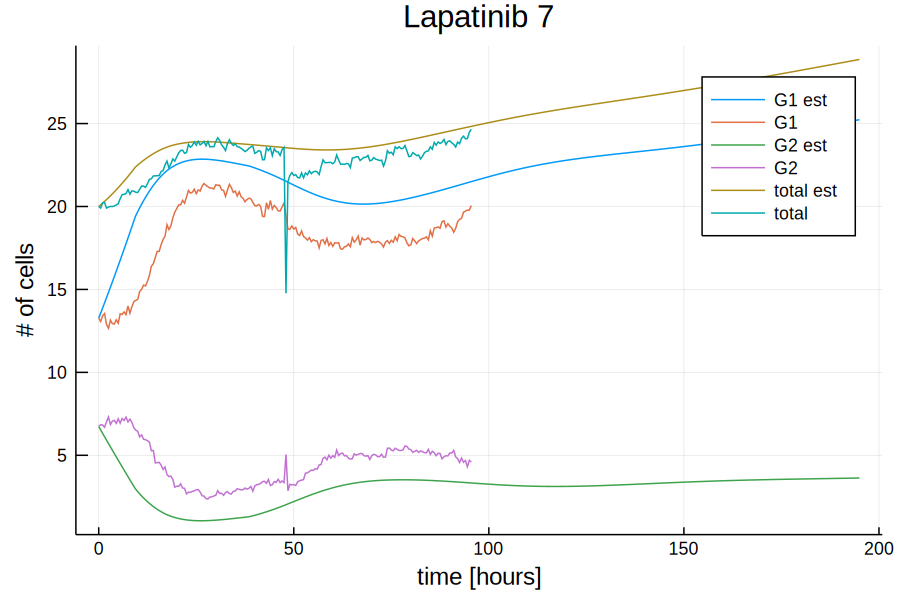

In [10]:
j = 7 # trial number
# for instance we want to plot the data and estimated for some trial 
plotIt(p[:, j], g1, g2, g1_0, g2_0, pop, j, "Lapatinib 7")

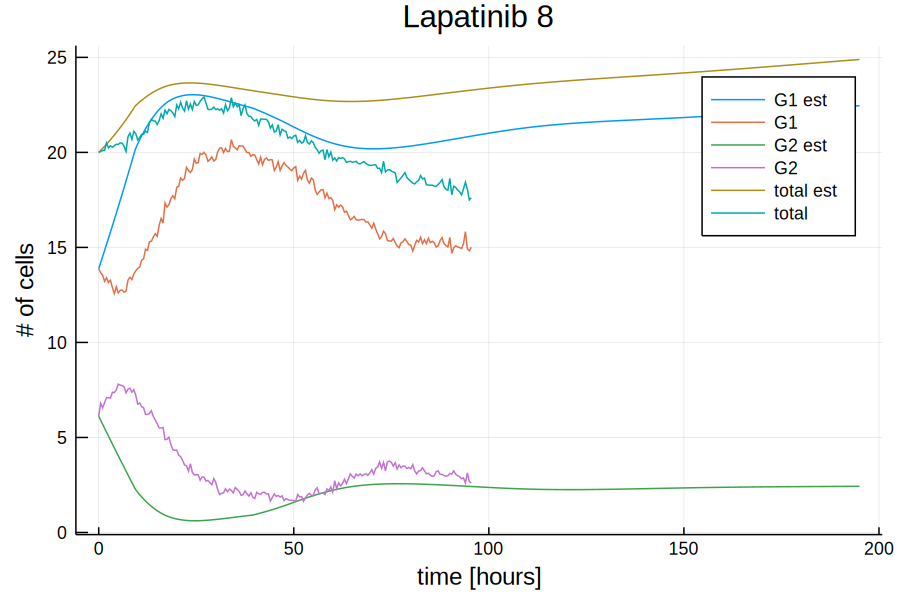

In [11]:
j = 8 # trial number
# for instance we want to plot the data and estimated for some trial 
plotIt(p[:, j], g1, g2, g1_0, g2_0, pop, j, "Lapatinib 8")